In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as sm
import warnings
warnings.filterwarnings('ignore')
from PIL import Image as Im 

In [153]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Netflix Dataset.csv")

In [154]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site,Unnamed: 29,Unnamed: 30
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube,NaN,NaN
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube,NaN,NaN
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube,NaN,NaN
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube,NaN,NaN


In [155]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [156]:
df.shape

(9425, 31)

In [157]:
## check is any null values are available in data
df.isnull().values.any()

True

In [158]:
## Checking how much missing values are available in each columns 
df.isnull().sum()
## df.isna().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
Unnamed: 29              9425
Unnamed: 30              9425
dtype: int64

In [159]:
df.isnull().sum()*100/len(df)

Title                      0.000000
Genre                      0.265252
Tags                       0.381963
Languages                  1.687003
Series or Movie            0.000000
Hidden Gem Score           0.106101
Country Availability       0.116711
Runtime                    0.010610
Director                  24.456233
Writer                    19.204244
Actors                     1.177719
View Rating               27.564987
IMDb Score                 0.084881
Rotten Tomatoes Score     42.228117
Metacritic Score          56.689655
Awards Received           44.551724
Awards Nominated For      32.350133
Boxoffice                 60.169761
Release Date               2.206897
Netflix Release Date       0.000000
Production House          53.389920
Netflix Link               0.000000
IMDb Link                  3.437666
Summary                    0.053050
IMDb Votes                 0.106101
Image                      0.000000
Poster                     9.952255
TMDb Trailer               0

<Axes: >

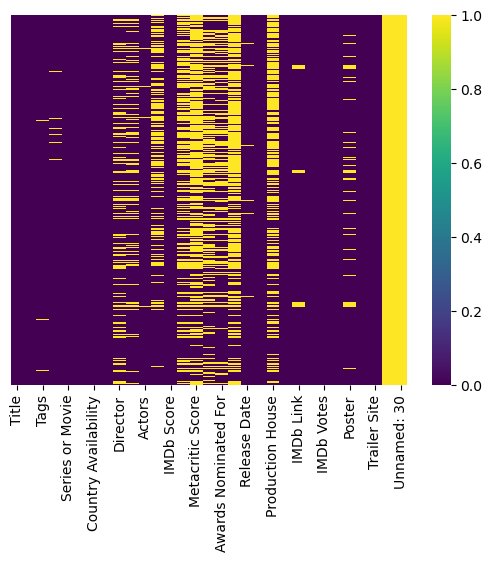

In [160]:
## visualization representation of total null values
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

In [161]:
df.drop(['View Rating','Metacritic Score','Boxoffice','Production House','Unnamed: 29',
         'Unnamed: 30','TMDb Trailer','Image','Poster','Netflix Link','IMDb Link','Summary'],axis=1,inplace=True)

In [162]:
df.drop(['Tags','Trailer Site','Release Date','Netflix Release Date'],axis=1,inplace=True)

In [163]:
df.head()

,Title,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,IMDb Score,Rotten Tomatoes Score,Awards Received,Awards Nominated For,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",7.9,98.0,74.0,57.0,205926.0
1,HOW TO BUILD A GIRL,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",5.8,79.0,1.0,NaN,2838.0
2,The Con-Heartist,"Comedy, Romance",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...","Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",7.4,NaN,NaN,NaN,131.0
3,Gleboka woda,Drama,Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",7.5,NaN,2.0,4.0,47.0
4,Only a Mother,Drama,Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",6.7,NaN,2.0,1.0,88.0


<Axes: >

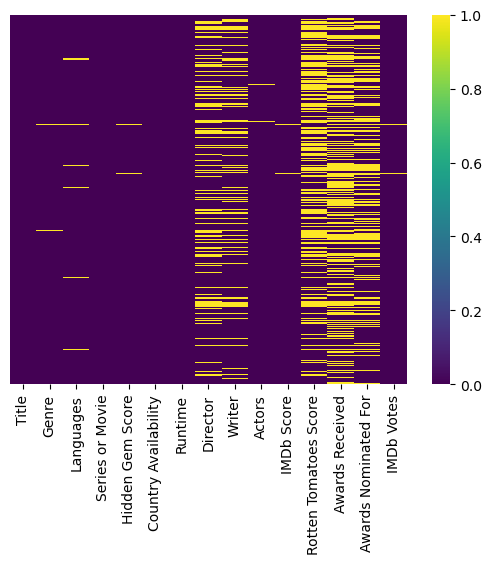

In [164]:
## visualization representation of total null values
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

In [165]:
a = df.isnull().sum()*100/len(df)

In [166]:
a.sort_values(ascending=False)

Awards Received          44.551724
Rotten Tomatoes Score    42.228117
Awards Nominated For     32.350133
Director                 24.456233
Writer                   19.204244
Languages                 1.687003
Actors                    1.177719
Genre                     0.265252
Country Availability      0.116711
Hidden Gem Score          0.106101
IMDb Votes                0.106101
IMDb Score                0.084881
Runtime                   0.010610
Title                     0.000000
Series or Movie           0.000000
dtype: float64

In [167]:
df.dropna(subset=['Director'],inplace=True)
df.dropna(subset=['Country Availability'],inplace=True)
df.dropna(subset=['Languages'],inplace=True)
df.dropna(subset=['Actors'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)
df.dropna(subset=['Writer'],inplace=True)

In [168]:
df.isnull().sum()

Title                       0
Genre                       0
Languages                   0
Series or Movie             0
Hidden Gem Score            3
Country Availability        0
Runtime                     0
Director                    0
Writer                      0
Actors                      0
IMDb Score                  3
Rotten Tomatoes Score    1424
Awards Received          2529
Awards Nominated For     1678
IMDb Votes                  3
dtype: int64

In [169]:
df.shape

(6694, 15)

In [170]:
df['Hidden Gem Score'].ffill(axis=0,inplace=True)
df['IMDb Score'].bfill(axis=0,inplace=True)
df['IMDb Votes'] = df['IMDb Votes'].fillna(df['IMDb Votes'].mode()[0])

In [171]:
df.isnull().sum()

Title                       0
Genre                       0
Languages                   0
Series or Movie             0
Hidden Gem Score            0
Country Availability        0
Runtime                     0
Director                    0
Writer                      0
Actors                      0
IMDb Score                  0
Rotten Tomatoes Score    1424
Awards Received          2529
Awards Nominated For     1678
IMDb Votes                  0
dtype: int64

In [172]:
df['Rotten Tomatoes Score'].fillna(df['Rotten Tomatoes Score'].mean(),inplace=True)

Replacing Empty Value with 0 for 'Awards Received' & 'Awards Nominated For' by 0 as, there might be a chance were the respesctive 'Series or Movie' might have not got any recieve.

In [173]:
## Using fillna method with the value 0
df['Awards Received'] = df['Awards Received'].fillna(0)

In [174]:
##Using replace method along with np.nan command to make nan value as 0
df['Awards Nominated For'] = df['Awards Nominated For'].replace(np.nan,0)

In [175]:
df.isnull().sum()

Title                    0
Genre                    0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
IMDb Score               0
Rotten Tomatoes Score    0
Awards Received          0
Awards Nominated For     0
IMDb Votes               0
dtype: int64

In [177]:
df.shape

(6694, 15)

<Axes: >

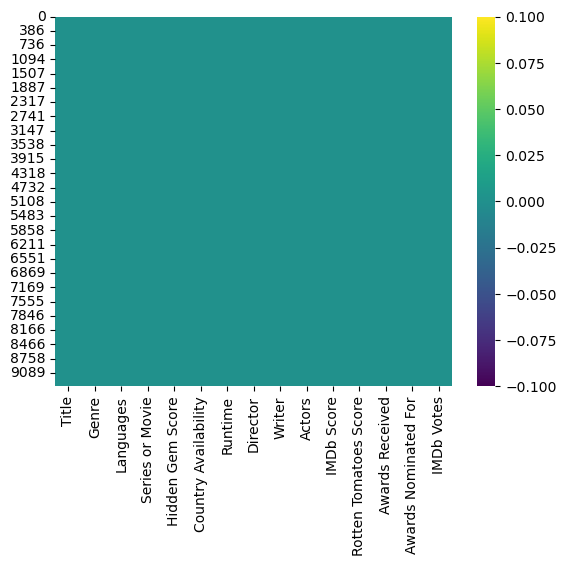

In [179]:
sns.heatmap(df.isnull(),xticklabels=True,cmap='viridis')

<Axes: xlabel='Series or Movie', ylabel='count'>

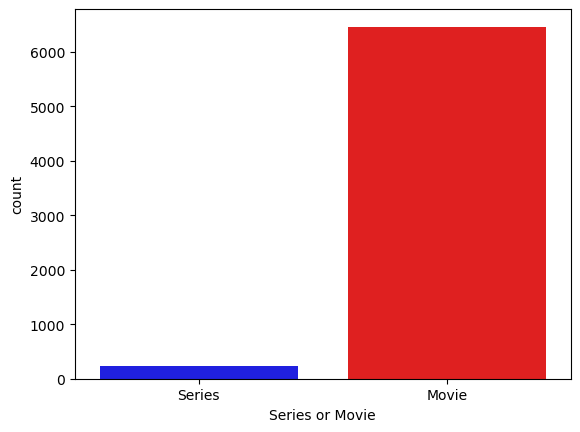

In [190]:
sns.countplot(x="Series or Movie",data=df,palette=['Blue','red'])

<Axes: xlabel='IMDb Score', ylabel='Count'>

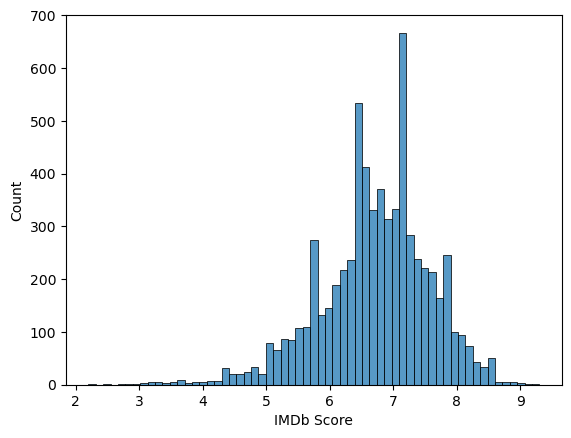

In [191]:
sns.histplot(x=df['IMDb Score'])